# DNN

https://www.tensorflow.org/tutorials/keras/classification
___

In [1]:
%tensorflow_version 2.x

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}
tf.test.gpu_device_name() # GPU を認識しているか確認

TensorFlow 2.x selected.


'/device:GPU:0'

### データのロード

In [0]:
fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

### モデルを作る

In [4]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # 最初のみ input shape を指定
    keras.layers.Dense(256, activation='relu'),  # 28*28 -> 256
    keras.layers.Dense(128, activation='relu'),  # 256 -> 128
    keras.layers.Dense(32, activation='relu'),   # 128 -> 32
    keras.layers.Dense(16, activation='relu'),  # 32 -> 16
    keras.layers.Dense(10, activation='softmax') # 16 -> 10
])
print(model)

In [0]:
from tensorflow.keras import optimizers
model.compile(optimizer=optimizers.Adam(learning_rate=0.002),  # str or optimaizer instance. optimaizer='adam' だと全くパラメータ指定してないことになるよね
              loss="sparse_categorical_crossentropy", # ラベルがone-hot エンコーディングで表現されていないのでこれを使う
              metrics=["accuracy"]) # 訓練とテストのステップを監視するのに使用


### 学習

In [6]:
%%time
model.fit(train_images, 
          train_labels, 
          epochs=30)

Train on 60000 samples
Epoch 1/30
60000/60000 [==============================] - 5s 86us/sample - loss: 0.5160 - accuracy: 0.8151
Epoch 2/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3849 - accuracy: 0.8590
Epoch 3/30
60000/60000 [==============================] - 4s 74us/sample - loss: 0.3502 - accuracy: 0.8727
Epoch 4/30
60000/60000 [==============================] - 5s 75us/sample - loss: 0.3271 - accuracy: 0.8790
Epoch 5/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.3091 - accuracy: 0.8867
Epoch 6/30
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2954 - accuracy: 0.8913
Epoch 7/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2852 - accuracy: 0.8942
Epoch 8/30
60000/60000 [==============================] - 5s 76us/sample - loss: 0.2752 - accuracy: 0.8973
Epoch 9/30
60000/60000 [==============================] - 5s 75us/sample - loss: 0.2672 - accuracy: 0.9002
Epoch 10/30
60

### 推論

In [7]:
predictions = model.predict(test_images)
pred_labels = np.argmax(predictions, axis=1)
test_acc = np.mean(pred_labels == test_labels)
# test_loss, test_acc = model.evaluate(test_images,  test_labels)

print('\nTest accuracy:', test_acc)


Test accuracy: 0.8895


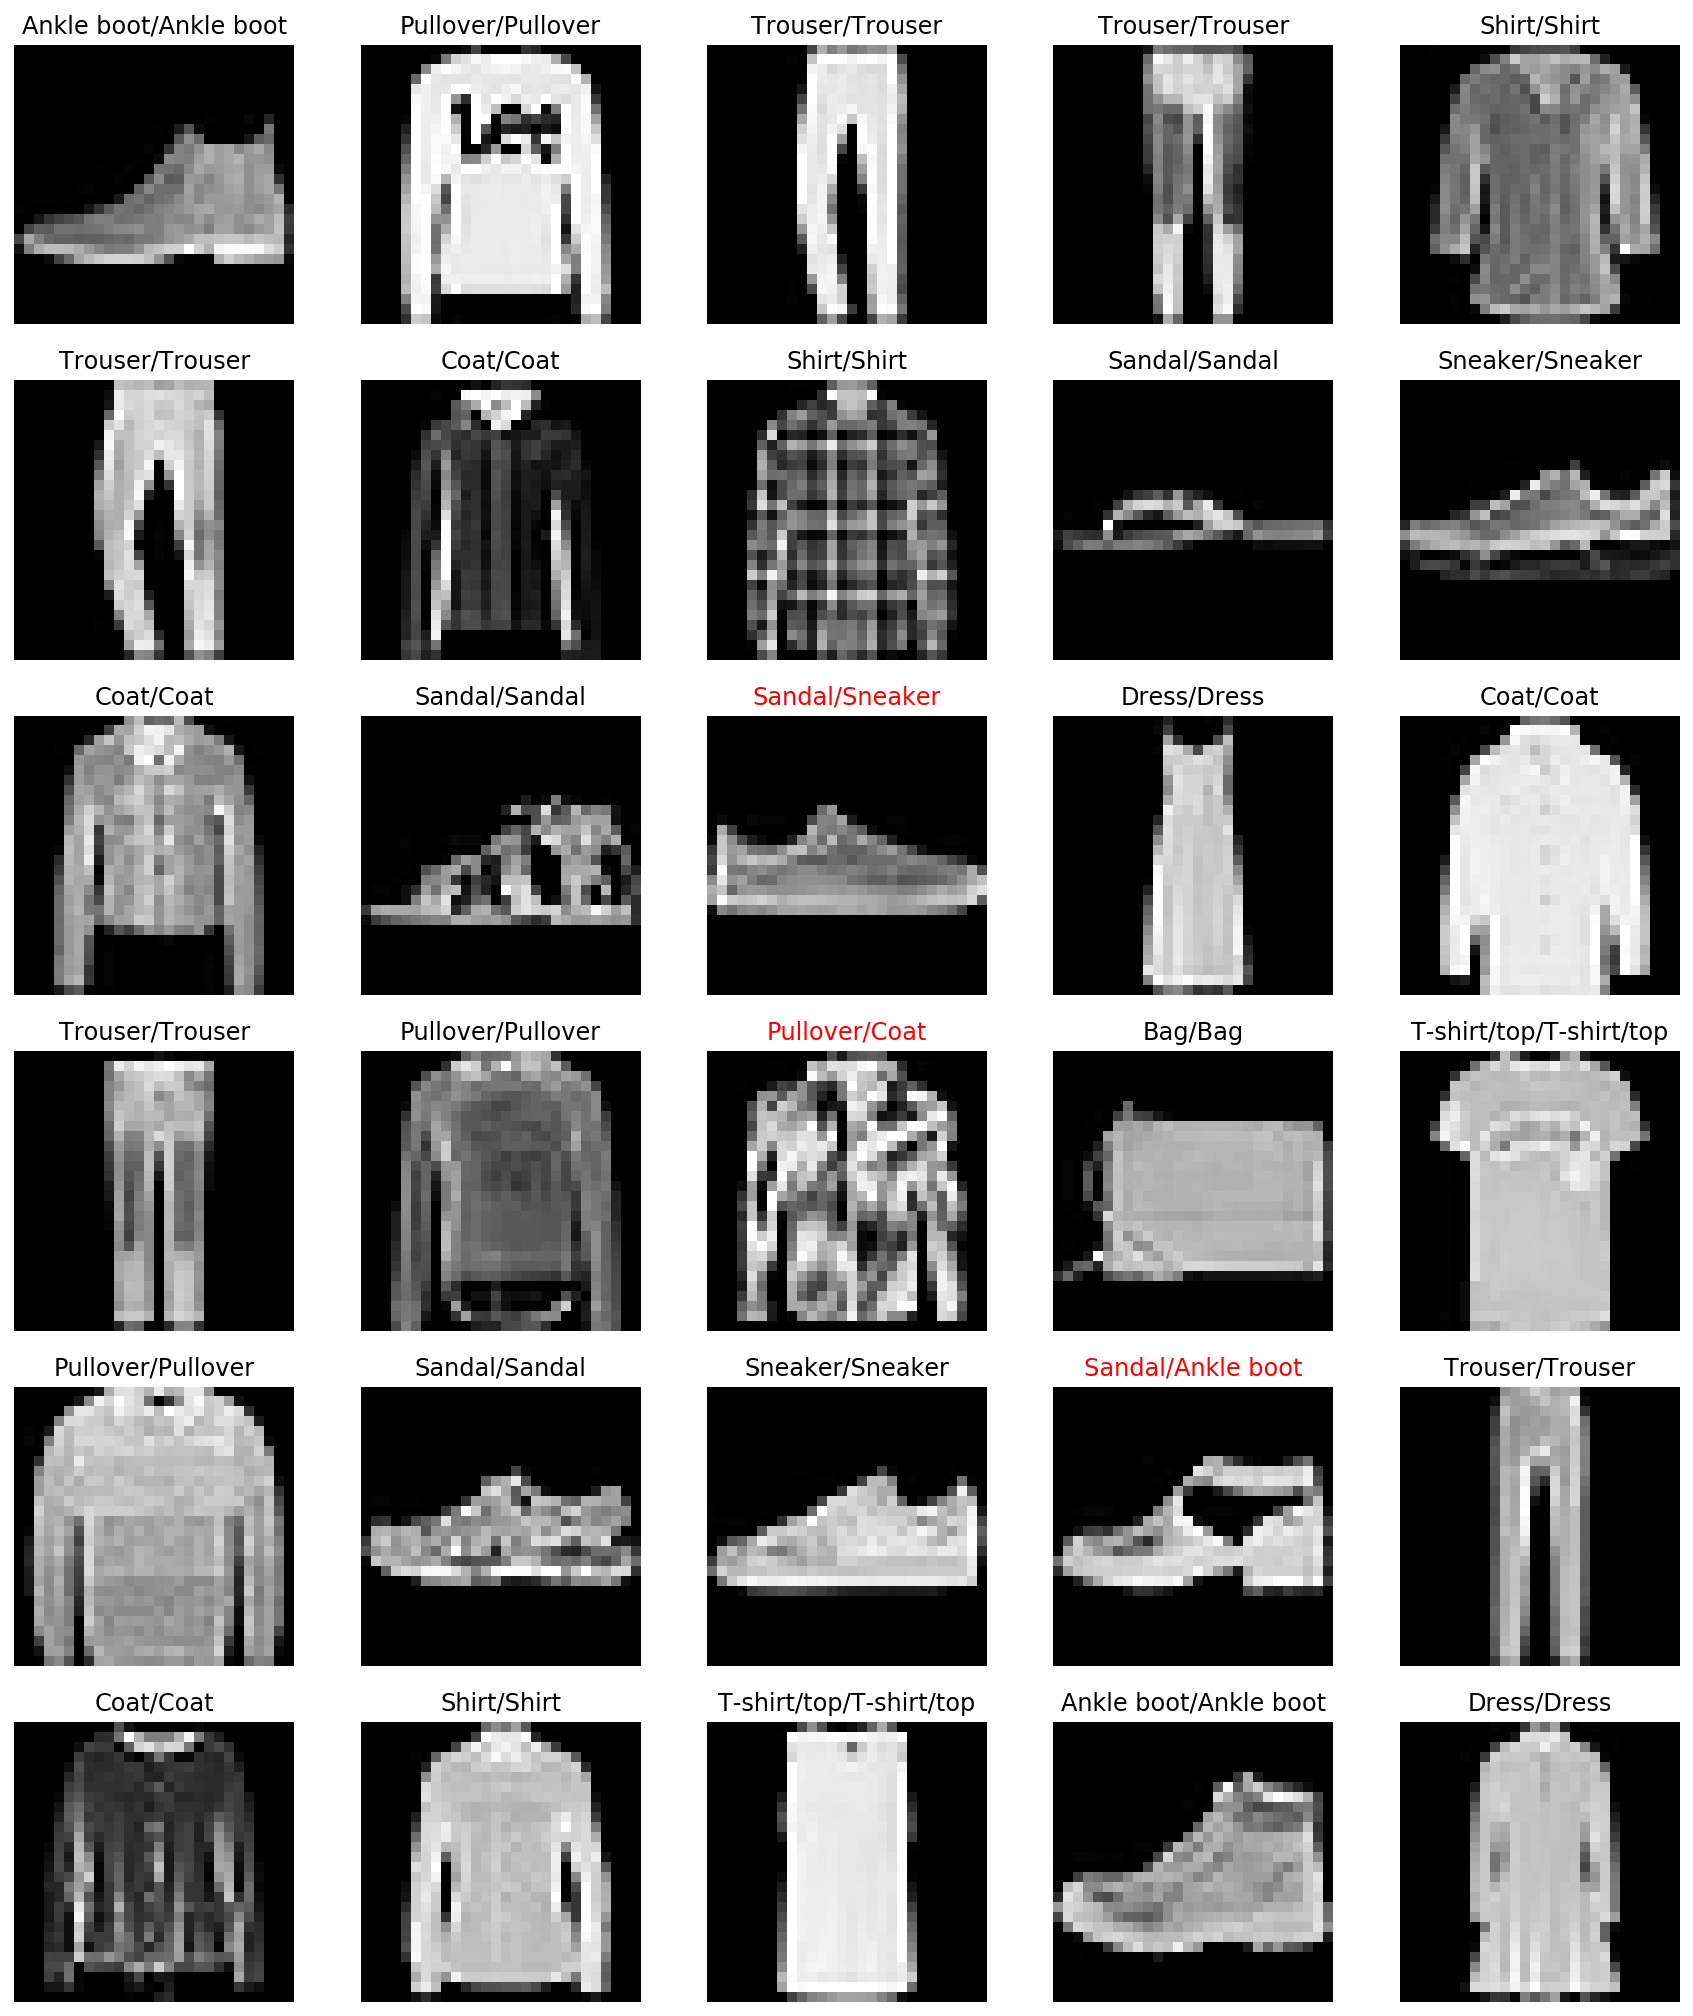

In [8]:
l  = 5
h = 6
plt.figure(figsize=(15, 18))
for i, (img , pred_l, test_l) in enumerate(zip(test_images[:l*h], pred_labels[:l*h], test_labels[:l*h]), start=1):
    plt.subplot(h, l, i)
    plt.imshow(img, cmap="gray")
    if pred_l != test_l:
        color = "red"
    else:
        color = "black"
    plt.title(f"{class_names[pred_l]}/{class_names[test_l]}", color=color)
    plt.axis("off")
plt.show()